## T1DEXI implementation
This serves in support of the final t1dexi class implementation. Some testing, verification is done. Some further analysis and output verificaiton are done here as well.

In [29]:
#append partent directory to path
import sys,os
sys.path.append('../..')
from studies import t1dexi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from importlib import reload
from src import drawing,cdf
from src import pandas_helper as ph
from src import tdd
reload(ph)
from src.pandas_helper import head_tail

In [39]:
reload(t1dexi)
study = t1dexi.T1DEXI(study_path=os.path.join(os.getcwd(), '..', '..', 'data', 'raw', 'T1DEXI'))
#study.load_data()

## Basal extraction

In [7]:
df_basal = study.extract_basal_event_history()

Dropping 14020 rows with NaN basal rates


/var/folders/m4/5d02b2xs0l52lbxzbk0t3vym0000gp/T/ipykernel_87297/533742789.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tdds = df_basal.groupby('patient_id').apply(tdd.calculate_daily_basal_dose)


patient_id
981     86.608775
77      62.138016
870     57.550844
1142    52.723159
1138    49.758632
Name: basal, dtype: float64

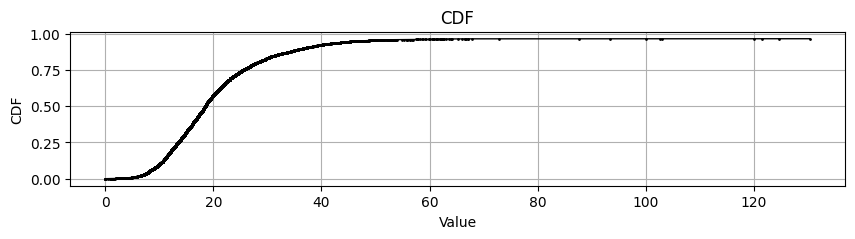

In [144]:
#draw tdd cdf
from src import tdd
from src import cdf
tdds = df_basal.groupby('patient_id').apply(tdd.calculate_daily_basal_dose)

plt.figure(figsize=(10,2));ax=plt.gca()
cdf.plot_cdf(tdds.basal,ax=ax)
display(tdds.basal.groupby('patient_id').mean().sort_values(ascending=False).head())

,basal
date,
2020-08-25,NaN
2020-08-26,NaN
2020-08-27,18.088318
2020-08-28,32.379502
2020-08-29,30.098657
2020-08-30,43.839421
2020-08-31,31.198710
2020-09-01,16.956720
2020-09-02,NaN


,USUBJID,FATEST,FAORRES,FADTC,FADUR,INSNMBOL,INSEXBOL,DXTRT
1506568,1149,BASAL INSULIN,32.0,2020-08-25 03:06:47,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
1509489,1149,BASAL INSULIN,31.0,2020-08-25 20:00:44,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
1514655,1149,BASAL INSULIN,31.0,2020-08-27 02:40:34,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
1522087,1149,BASAL INSULIN,31.0,2020-08-28 21:38:55,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
1522913,1149,BASAL INSULIN,31.0,2020-08-29 01:59:50,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
1529786,1149,BASAL INSULIN,31.0,2020-08-30 21:00:04,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
1530241,1149,BASAL INSULIN,31.0,2020-08-31 00:14:25,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
1534743,1149,BASAL INSULIN,31.0,2020-09-01 01:43:38,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
1542018,1149,BASAL INSULIN,31.0,2020-09-03 00:12:15,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
1545122,1149,BASAL INSULIN,31.0,2020-09-03 20:42:49,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS


,patient_id,datetime,basal_rate
1506568,1149,2020-08-25 03:06:47,1.893584
1509489,1149,2020-08-25 20:00:44,1.010961
1514655,1149,2020-08-27 02:40:34,0.721392
1522087,1149,2020-08-28 21:38:55,7.128713
1522913,1149,2020-08-29 01:59:50,0.720865
1529786,1149,2020-08-30 21:00:04,9.570363
1530241,1149,2020-08-31 00:14:25,1.216309
1534743,1149,2020-09-01 01:43:38,0.666997
1542018,1149,2020-09-03 00:12:15,1.511499
1545122,1149,2020-09-03 20:42:49,11160.000000


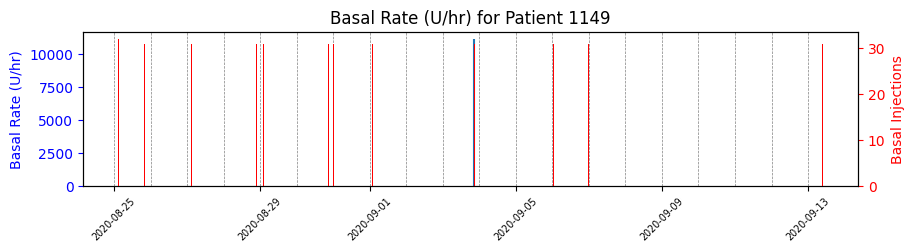

In [53]:
#draw patient with highest tdd
patient = '981'
patient ='1149'
display(tdds.xs(patient, level=0))

temp = df_basal.loc[df_basal['patient_id']==patient]
sub_df = df_basal.loc[df_basal['patient_id']==patient]
sub_facm= study.facm.loc[(study.facm.USUBJID==patient) & (study.facm.FATEST=='BASAL INSULIN')]

plt.figure(figsize=(10,2)); ax=plt.gca()
drawing.drawBasal(ax,temp.datetime,temp.basal_rate,label='Basal Rate (U/hr)')
twin_ax = ax.twinx()   
drawing.drawBoluses(twin_ax,sub_facm.FADTC,sub_facm.FAORRES,label='Basal Injections',width=timedelta(minutes=30))


#add vertical lines for midnights
midnights = pd.date_range(start=temp.datetime.min().normalize(), end=temp.datetime.max(), freq='D')
for midnight in midnights:
    ax.axvline(midnight, color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('Date')
ax.set_ylabel('Basal Rate (U/hr)')
twin_ax.set_ylabel('Basal Injections')
plt.title('Basal Rate (U/hr) for Patient {}'.format(patient))
twin_ax.tick_params(axis='y', colors='red')
twin_ax.yaxis.label.set_color('red')

ax.tick_params(axis='y', colors='blue')
ax.yaxis.label.set_color('blue')

ax.xaxis.set_tick_params(rotation=45, labelsize='x-small')

display(sub_facm)
display(sub_df)

# Save the figure
file = os.path.join(os.getcwd(),'..','..','docs','data_sets','assets','t1dexi_mdi_basal_rate_vs._injections.png')
plt.savefig(file)

In this patient we see that basal injections are sometimes missed causing strong variation in estimated basal rates. The last basal rate is set to 0 because we can't calcualte the time until the next value. We could fill these with previous estimates. However, in this patient it wouldn't work as previous injections were either not injected or missed to log.  

In [26]:
## extract boluses

#assign FAORRES to INSNMBOL if INSNMBOL is NaN
bolus_rows = study.facm.loc[study.facm.FATEST=='BOLUS INSULIN'].copy()
bolus_rows.loc[(bolus_rows.FATEST=='BOLUS INSULIN') & bolus_rows[['INSEXBOL','INSNMBOL']].isna().all(axis=1),'INSNMBOL'] = bolus_rows.FAORRES

# Replace values in FAORRES, INSEXBOL, INSMBOL that are < 1e-20 with zero
bolus_rows.loc[bolus_rows.FAORRES < 1e-20, 'FAORRES'] = 0
bolus_rows.loc[bolus_rows.INSEXBOL < 1e-20, 'INSEXBOL'] = 0
bolus_rows.loc[bolus_rows.INSNMBOL < 1e-20, 'INSNMBOL'] = 0
 
bolus_rows.loc[:,'INSNMBOL'] = bolus_rows.INSNMBOL.fillna(0)
bolus_rows.loc[:,'INSEXBOL'] = bolus_rows.INSEXBOL.fillna(0)
 
#split extended and normal boluses
normal   = bolus_rows.loc[bolus_rows.INSNMBOL>0][['USUBJID','FADTC','FADUR','INSNMBOL']].copy()
normal = normal.rename(columns={'INSNMBOL':'bolus'})
extended = bolus_rows.loc[bolus_rows.INSEXBOL>0][['USUBJID','FADTC','FADUR','INSEXBOL']].copy()
extended = extended.rename(columns={'INSEXBOL':'bolus'})

#when there was a normal bolus, it would still carry the extended bolus duration
normal['FADUR'] = timedelta(0)

concat = pd.concat([normal,extended],ignore_index=True)

display(normal.head(3))
display(extended.head(3))  
display(head_tail(concat))
assert (len(normal)+len(extended)) == len(concat)

,USUBJID,FADTC,FADUR,bolus
26,576,2019-02-21 23:31:22,0 days,5.3
33,576,2019-02-22 02:52:24,0 days,8.8
36,576,2019-02-22 05:45:00,0 days,8.4


,USUBJID,FADTC,FADUR,bolus
2897,317,2019-02-28 06:27:59,0 days 01:00:00,1.18
3075,317,2019-02-28 13:00:32,0 days 00:45:00,1.09
13597,873,2019-03-13 08:24:11,0 days 01:30:00,0.55


,USUBJID,FADTC,FADUR,bolus
0,576,2019-02-21 23:31:22,0 days 00:00:00,5.30
1,576,2019-02-22 02:52:24,0 days 00:00:00,8.80
114896,1143,2021-07-02 20:45:05,0 days 02:00:00,4.75
114897,1143,2021-07-10 20:48:16,0 days 03:00:00,6.90


In [100]:
# we see that sometimes, basal doeses are logged very quickly after another
df_p = study.facm.loc[(study.facm.USUBJID=='1149') & (study.facm.FATEST=='BASAL INSULIN')]
#basal_rows = study.facm.loc[study.facm.FATEST=='BASAL INSULIN'].copy()
#basal_rows.sort_values(by=['USUBJID','FADTC'],inplace=True)

def get_index_short_diffs(df,date_col, val_col):
    """_summary_
    Find index of rows where the difference between two consecutive rows is less than 60 seconds
    
    Returns:
        index: row index (not the iloc position) of rows where previous row is less than 60 seconds apart from current row
    """

    sub_df = df.loc[(df[date_col].diff().dt.total_seconds()<60) & (df[val_col].diff() < 1e-10)]
    return sub_df.index

indexes = get_index_short_diffs(df_p,'FADTC','FAORRES')
for i in indexes:
    i_loc = df_p.index.get_loc(i)
    display(df_p.iloc[i_loc-1:i_loc+1])

,USUBJID,FATEST,FAORRES,FADTC,FADUR,INSNMBOL,INSEXBOL,DXTRT
1545122,1149,BASAL INSULIN,31.0,2020-09-03 20:42:49,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS
1545124,1149,BASAL INSULIN,31.0,2020-09-03 20:42:59,NaT,NaN,NaN,MULTIPLE DAILY INJECTIONS


## Duplicated MDI Basal injections (within 30 seconds)

In [114]:
# Function to find pairs of rows
def filter_by_time_and_value(group):
    # Sort by FADTC within the group
    group = group.sort_values('FADTC')
    # Calculate time differences
    group['TimeDiff'] = group['FADTC'].diff()
    # Identify rows where the conditions are met
    mask = (group['TimeDiff'] <= timedelta(seconds=30)) & (group['FAORRES']>1) & (group['FAORRES'] == group['FAORRES'].shift())
    # Get the pairs by including both the current and previous rows
    return group[mask | mask.shift(-1)]

basal_rows = study.facm.loc[study.facm.FATEST=='BASAL INSULIN'].copy()
result = basal_rows.groupby('USUBJID', group_keys=False).apply(filter_by_time_and_value)
display(result[['USUBJID','FADTC','FAORRES']])

/var/folders/m4/5d02b2xs0l52lbxzbk0t3vym0000gp/T/ipykernel_87297/4218105254.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = basal_rows.groupby('USUBJID', group_keys=False).apply(filter_by_time_and_value)


,USUBJID,FADTC,FAORRES
1545122,1149,2020-09-03 20:42:49,31.0
1545124,1149,2020-09-03 20:42:59,31.0
531022,1386,2020-01-05 01:31:11,11.0
531024,1386,2020-01-05 01:31:25,11.0
880310,255,2020-04-19 09:20:57,12.0
880313,255,2020-04-19 09:21:03,12.0
1828290,475,2020-11-15 22:20:58,8.0
1828293,475,2020-11-15 22:21:10,8.0
1844360,475,2020-11-19 08:23:15,8.0
1844362,475,2020-11-19 08:23:21,8.0


In [47]:
from src import drawing
reload(drawing)
df_basal = study.extract_basal_event_history()

Text(0.5, 1.0, 'Rolling Average Basal Rate (U/hr) for CSII vs. MDI Patients')

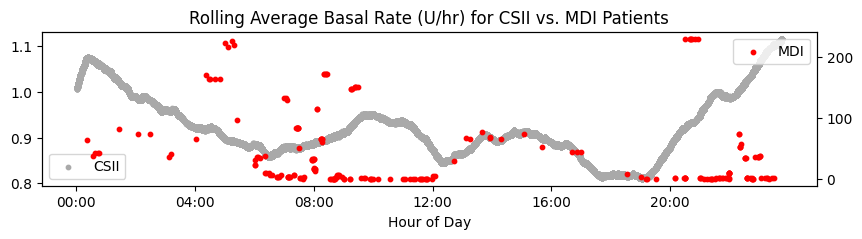

In [133]:
reload(drawing)
ids_mdi = study.facm.loc[study.facm.DXTRT=='MULTIPLE DAILY INJECTIONS'].USUBJID.unique()
plt.figure(figsize=(10,2));ax=plt.gca()

temp = df_basal.loc[~df_basal.patient_id.isin(ids_mdi)]
drawing.drawMovingAverage(ax, temp, 'datetime', 'basal_rate', aggregator='mean',label='CSII')

twin_ax = ax.twinx()
temp = df_basal.loc[df_basal.patient_id.isin(ids_mdi)]
drawing.drawMovingAverage(twin_ax, temp, 'datetime', 'basal_rate', aggregator='mean',color='red',label='MDI')

plt.title('Rolling Average Basal Rate (U/hr) for CSII vs. MDI Patients')

In [52]:
df_basal.sort_values('basal_rate',ascending=False).head()

,patient_id,datetime,basal_rate
1545122,1149,2020-09-03 20:42:49,11160.000000
985636,1,2020-05-15 00:02:21,7200.000000
880310,255,2020-04-19 09:20:57,7200.000000
1785095,987,2020-11-05 07:00:46,6171.428571
2215680,227,2021-06-29 05:03:36,5700.000000


## Bolus extraction


In [134]:
reload(t1dexi)
study = t1dexi.T1DEXI(study_path=os.path.join(os.getcwd(), '..', '..', 'data', 'raw', 'T1DEXI'))
df_bolus = study.extract_bolus_event_history()

In [44]:
## calcualte tdds
tdd_bolus = df_bolus.groupby('patient_id').apply(tdd.calculate_daily_bolus_dose)
display(head_tail(tdd_bolus.sort_values(by='bolus',ascending=False)))

/var/folders/m4/5d02b2xs0l52lbxzbk0t3vym0000gp/T/ipykernel_87297/1633625713.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tdd_bolus = df_bolus.groupby('patient_id').apply(tdd.calculate_daily_bolus_dose)


bolus
patient_id date                 
1014       2019-11-30  128.52401
           2019-11-10  124.36269
897        2020-10-12    0.14000
1248       2020-02-11    0.10000

Text(0.5, 1.0, 'Rolling Average Bolus Dose (U)')

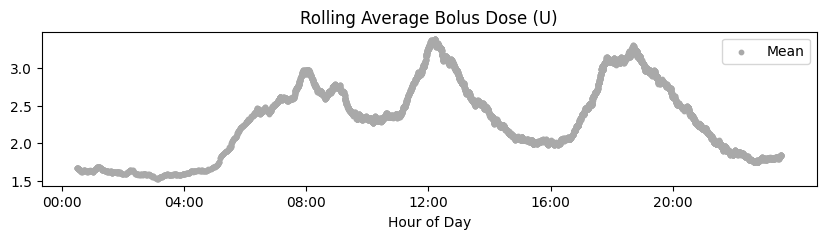

In [141]:
reload(drawing)
plt.figure(figsize=(10,2));ax=plt.gca()
drawing.drawMovingAverage(ax, df_bolus, 
                          study.COL_NAME_DATETIME, study.COL_NAME_BOLUS, 
                          aggregator='mean',label='Mean')
plt.title('Rolling Average Bolus Dose (U)')

## TDD correlation

In [170]:
#merge 
tdds_merged = pd.merge(tdds,tdd_bolus,how='outer',on=['patient_id','date']).dropna(how='any')

(0.0, 50.0)

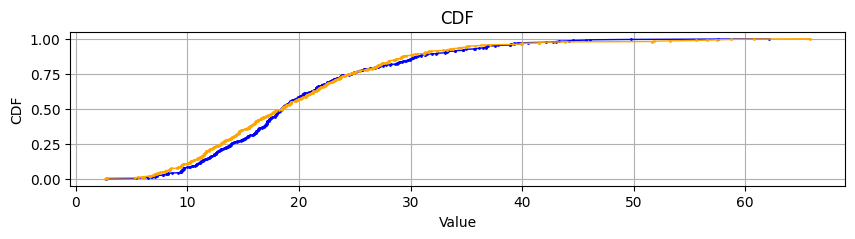

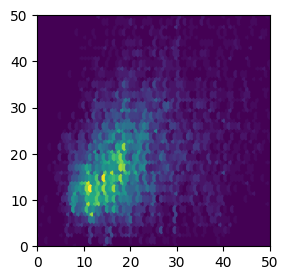

In [180]:
## Patient Mean TDD
tdds_mean = tdds_merged.groupby('patient_id').mean()

plt.figure(figsize=(10,2));ax=plt.gca()
cdf.plot_cdf(tdds_mean.basal,ax=ax,label='basal',color='blue')
cdf.plot_cdf(tdds_mean.bolus,ax=ax,label='bolus',color='orange')
#cdf.plot_cdf(tdds_mean.sum(axis=1),ax=plt.gca(),color='black',label='total')

plt.figure(figsize=(3,3));ax=plt.gca()
ax.hexbin(tdds_merged.basal,tdds_merged.bolus)
ax.set_xlim(0,50);ax.set_ylim(0,50)

## Glucose

In [186]:
reload(t1dexi)
study = t1dexi.T1DEXI(study_path=os.path.join(os.getcwd(), '..', '..', 'data', 'raw', 'T1DEXI'))
df_cgm = study.extract_cgm_history()

Text(0.5, 1.0, 'Rolling Average CGM (mg/dL)')

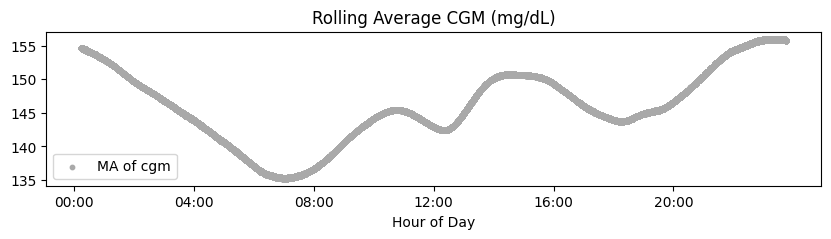

In [185]:
plt.figure(figsize=(10,2));ax=plt.gca()
drawing.drawMovingAverage(ax, df_cgm, study.COL_NAME_DATETIME, study.COL_NAME_CGM, aggregator='mean')
plt.title('Rolling Average CGM (mg/dL)')

In [201]:
df_cgm.head()

,patient_id,cgm,datetime
0,1,115.0,2020-05-11 00:01:17
1,1,109.0,2020-05-11 00:06:17
2,1,105.0,2020-05-11 00:11:17
3,1,106.0,2020-05-11 00:16:18
4,1,110.0,2020-05-11 00:21:18


In [204]:
df_cgm.to_csv('cgm.csv',index=False, compression='gzip')

In [203]:
temp = df_cgm.copy()
temp['datetime'] = temp.datetime.astype('int64')//10**9
temp['cgm'] = temp.cgm.astype('int')
temp.to_csv('cgm_ts.csv',index=False)

In [220]:
df_basal.basal_rate.round(4)

0          0.00
3          0.00
5          0.00
7          0.00
9          0.00
           ... 
2219511    1.15
2219514    1.05
2219516    0.00
2219517    1.05
2219520    1.35
Name: basal_rate, Length: 1052843, dtype: float64